# We’ll be using the digits dataset in the scikit learn library to predict digit values from images using the logistic regression model in Python.

### Importing libraries and their associated methods

In [1]:
import re

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [5]:
digits = load_digits()

### Determining the total number of images and labels

In [6]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Displaying some of the images and their labels

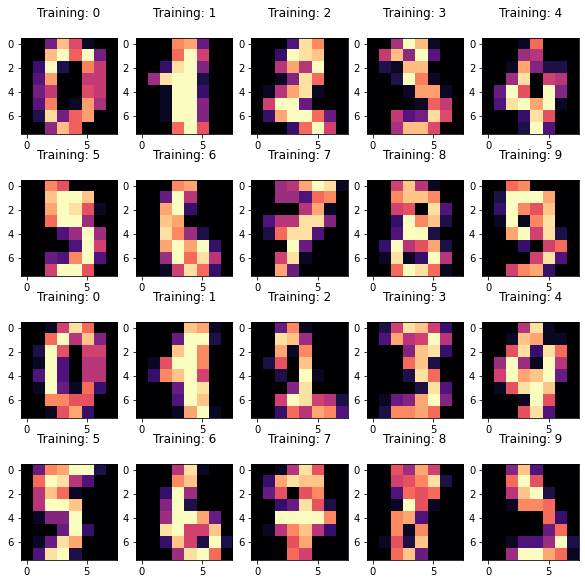

In [34]:
plt.figure(figsize =(10,10))

for index, (image, label) in enumerate (zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = 'magma')
    plt.title('Training: %i\n' % label, fontsize = 12)

### Dividing dataset into “training” and “test” set 

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (digits.data, digits.target, test_size = 0.23, random_state = 2)

In [48]:
print(x_train.shape)

(1383, 64)


In [49]:
print(y_train.shape)

(1383,)


In [50]:
print(x_test.shape)

(414, 64)


In [51]:
print(y_test.shape)

(414,)


### Importing the logistic regression model

In [57]:
from sklearn.linear_model import LogisticRegression

### Making an instance of the model and training it

Increased max_iter to 10000 as default value is 1000. Possibly, increasing no. of iterations will help algorithm to converge. For me it converged and solver was -'lbfgs'

In [68]:
logisticRegr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [69]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

### Predicting the output of the first element of the test set

In [70]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


### Predicting the output of the first 10 elements of the test set

In [71]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

### Prediction for the entire dataset

In [77]:
x_pred = logisticRegr.predict(x_test)

### Determining the accuracy of the model

In [78]:
score = logisticRegr.score(x_test, y_test)
score

0.9492753623188406

### Representing the confusion matrix in a heat map

In [81]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, x_pred)
print(cf_matrix)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 46  0  1  0  0  0  0  1  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  2  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 43  0  0  0  1]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  1  0  0  0 36  1]
 [ 0  0  0  1  0  1  0  0  1 31]]


<AxesSubplot:>

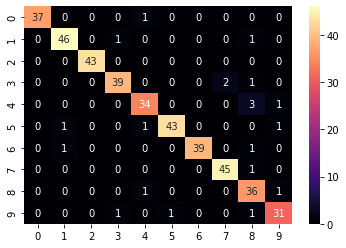

In [84]:
import seaborn as sns

sns.heatmap(cf_matrix, annot=True, cmap = 'magma')

### Presenting predictions and actual output

In [85]:
index = 0
misclassifiedIndex = []

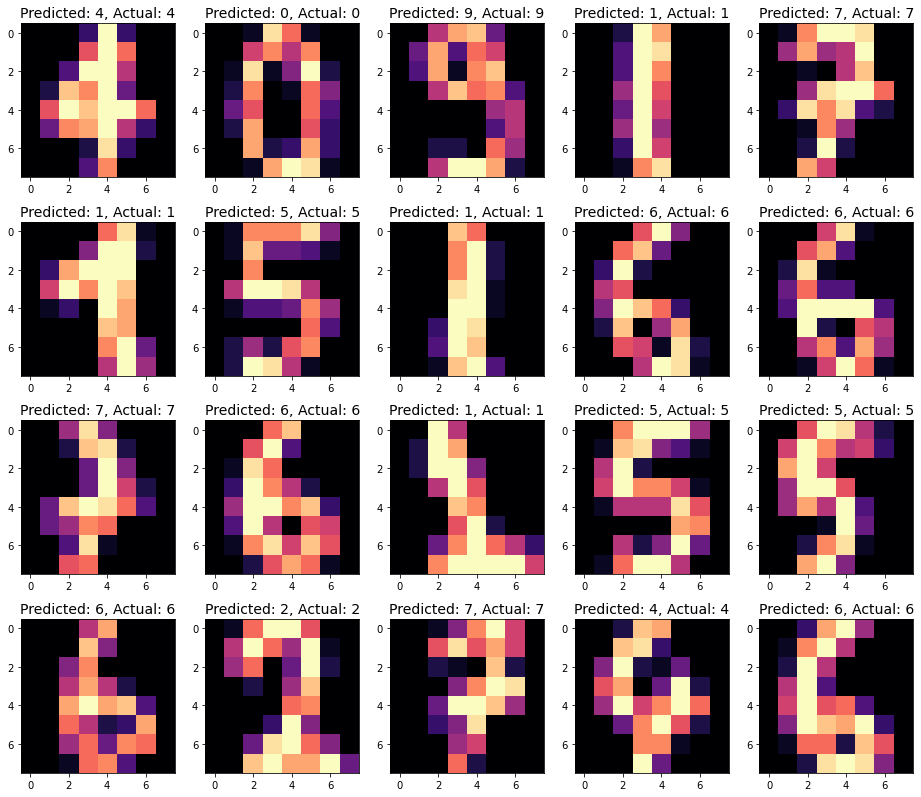

In [99]:
for predict, actual in zip(x_pred, y_test):
    if predict == actual:
        misclassifiedIndex.append(index)
    index += 1

plt.figure(figsize=(16,14))

for plotIndex, wrong in enumerate(misclassifiedIndex[0:20]):
    plt.subplot(4,5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = 'magma')
    plt.title("Predicted: {}, Actual: {}" .format(predictions[wrong], y_test[wrong]), fontsize = 14)